1. **Feature Exploration, Engineering and Cleaning**


In [1332]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 50)

**Reading** train dataset (891 records) and test dataset(418 records).
**Combining** both datasets to fill the missing values to be more accurate.

In [1333]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
combined = pd.concat([train,test],axis=0,ignore_index=True)
combined.shape

(1309, 12)

**Observation** - First go through the combined dataset
* Fare
> 1. you will observe that different people has same ticket number and same fare.
> 1. so we have to average the value of Fare for each individual.
> 1. but first, we have to make sure Fare value does not have any null values.
* Cabin
> 1. you will observe that missing Cabin values can be assigned from the same ticket number.

In [1334]:
combined.sort_values(['Fare','PassengerId'], ascending=[0,1]).head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755
1234,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,NaN,PC 17755
27,19.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950


* Counting null in each colum from combined dataset

In [1335]:
combined.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

**Fare Cleaning** - Fill missing **Fare** value by taking median of Fare for respective Pclass. 
> As Fare is proportional to Pclass.
* print(combined[combined['Fare'].isnull()])
* print(combined.groupby('Pclass').mean()['Fare'])
* print(combined.groupby('Pclass').median()['Fare'])
        Mean > Median, i.e. positively skewed data
* print(combined.loc[1043])

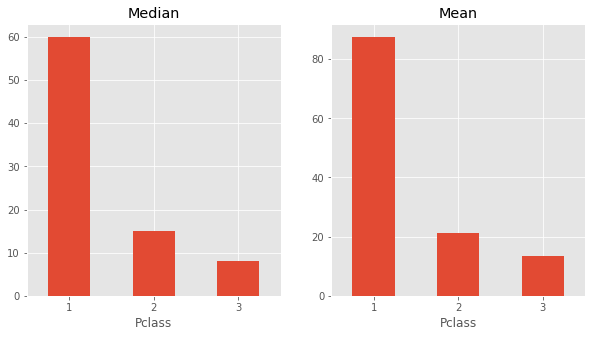

In [1336]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
plt.subplot(1,2,1)
combined['Fare'].groupby(combined['Pclass']).median().plot(kind='bar',title='Median')
plt.xticks(rotation=0)
plt.subplot(1,2,2)
combined['Fare'].groupby(combined['Pclass']).mean().plot(kind='bar',title='Mean')
plt.xticks(rotation=0)
plt.show()

combined['Fare'] = combined['Fare'].groupby(combined['Pclass']).apply(lambda x: x.fillna(x.median()))

**Fare_per_person** -
> * Creating **Fare_per_person** feature representing the fare per person i.e. splitting the total fare in a single ticket.

In [1337]:
combined['Fare_per_person'] = combined['Fare'].groupby(combined['Ticket']).transform(lambda x: x / x.count())
combined.sort_values(['Fare','PassengerId'], ascending=[0,1]).head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_per_person
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755,128.082300
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755,128.082300
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755,128.082300
1234,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,NaN,PC 17755,128.082300
27,19.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950,43.833333


**Cabin Cleaning** -  Assigning the missing **Cabin** values with repect to the Ticket number. 
> * We are interested in the Cabin class instead of Cabin number. 
> * And also unknown Cabin is represented by 'U'.

In [1338]:
combined['Cabin'] = combined['Cabin'].groupby(combined['Ticket']).apply(lambda x: x.fillna(x.astype(str).str[0].mode()[0])).apply(lambda x: x[0]).apply(lambda x: 'U' if(x=='n') else x)
combined.sort_values(['Fare','PassengerId'], ascending=[0,1]).head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_per_person
258,35.0,B,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755,128.082300
679,36.0,B,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755,128.082300
737,35.0,B,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755,128.082300
1234,58.0,B,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,NaN,PC 17755,128.082300
27,19.0,C,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950,43.833333


Below table represents the survival percentage of person corresponding to his/hers Cabin.

In [1339]:
pd.crosstab(combined[combined['Survived'].notnull()]['Cabin'],combined['Survived']).apply(lambda x : x / x.sum() * 100,axis=1)

Survived,0.0,1.0
Cabin,,
A,53.333333,46.666667
B,25.000000,75.000000
C,38.805970,61.194030
D,24.242424,75.757576
E,27.272727,72.727273
F,38.461538,61.538462
G,50.000000,50.000000
T,100.000000,0.000000
U,70.605613,29.394387


**Cabin_survived** - Grouping above Cabin categories
> * having high survival percentage (i.e. B,C,D,E,F) as 1 
> * having low survival percentage (i.e. A,G,T,U) as 0


In [1340]:
combined['Cabin_survived'] = combined['Cabin'].apply(lambda x: 1 if(x in ['B','C','D','E','F']) else 0)

**Embarked Cleaning** - Fill missing **Embarked** values by taking mode of Embarked. 
> * As it is most probable that these people might have got onboard as the majority of people did.


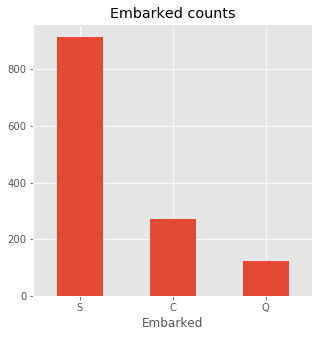

In [1341]:
combined['Embarked'].value_counts().plot(kind='bar',figsize=(5,5),title='Embarked counts')
plt.xticks(rotation=0)
plt.xlabel('Embarked')
plt.show()

combined['Embarked'].fillna(combined['Embarked'].mode()[0],inplace=True)

**Title** -
> **What's in a name?** -  William Shakespeare.
> * We are interested in the **Title** of the Name which should correspond to its appropriate  Age and Sex.

In [1342]:
combined['Title'] = combined['Name'].apply(lambda x: x.split(', ')[1].split('.')[0].strip())
pd.crosstab(combined['Title'],combined['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


1. Here we can observe that each Title is having distinct Sex, except **Dr.** which is having Sex male as a majority. So we are going to manually assign Female Dr to Sparsewomen.
1. And grouping the titles having less count to Sparsemen & Sparsewomen for male & female respectively.

In [1343]:
combined.loc[(combined['Title']=='Dr') & (combined['Sex']=='female'),'Title'] = 'Mrs'
title_mapping = {'Capt':'Mr', 'Col':'Mr','Don':'Mr','Dona':'Mrs',
                 'Dr':'Mr','Jonkheer':'Mr','Lady':'Mrs','Major':'Mr',
                 'Master':'Master','Miss':'Miss','Mlle':'Miss','Mme':'Mrs',
                 'Mr':'Mr','Mrs':'Mrs','Ms':'Miss','Rev':'Mr','Sir':'Mr',
                 'the Countess':'Mrs'}
#title_mapping = {'Capt':'Rareman', 'Col':'Rareman','Don':'Rareman','Dona':'Rarewoman',
#    'Dr':'Rareman','Jonkheer':'Rareman','Lady':'Rarewoman','Major':'Rareman',
#    'Master':'Master','Miss':'Miss','Mlle':'Rarewoman','Mme':'Rarewoman',
#    'Mr':'Mr','Mrs':'Mrs','Ms':'Rarewoman','Rev':'Mr','Sir':'Rareman',
#    'the Countess':'Rarewoman'}
combined['Title'] = combined['Title'].map(title_mapping)

In [1344]:
pd.DataFrame(dict(Max_Age = combined['Age'].groupby(combined['Title']).max(), 
                  Min_Age = combined['Age'].groupby(combined['Title']).min(),
                  Mean_Age = combined['Age'].groupby(combined['Title']).mean()))

,Max_Age,Mean_Age,Min_Age
Title,,,
Master,14.5,5.482642,0.33
Miss,63.0,21.824366,0.17
Mr,80.0,32.784298,11.00
Mrs,76.0,37.040000,14.00


Assigning Miss age smaller than 14 to **Girl** Title.
> As you can see that there is no separate Title given for small girls but given for small boys as Master.
> * This is why the range and mean of Miss is large. 


In [1345]:
combined.loc[(combined['Title']=='Miss') & (combined['Age']<=14.0),'Title'] = 'Girl'
combined['Title'].value_counts()

Mr        782
Miss      215
Mrs       202
Master     61
Girl       49
Name: Title, dtype: int64

**Age Cleaning** - Fill missing **Age** values by taking the median  Age of its corresponding Title.

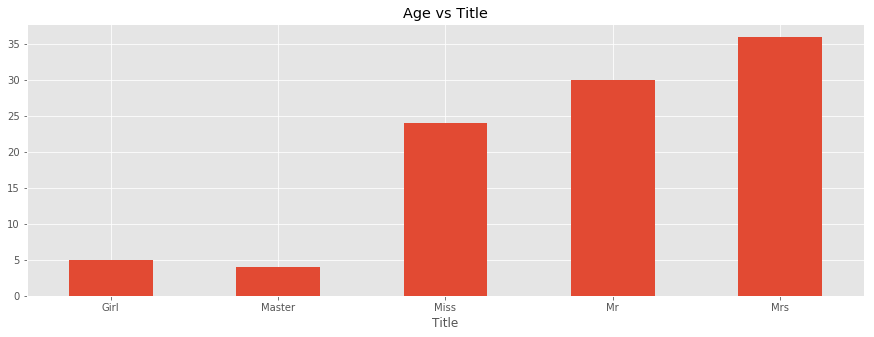

In [1346]:
combined['Age'] = combined['Age'].groupby(combined['Title']).apply(lambda x: x.fillna(x.median()))
combined['Age'].groupby(combined['Title']).median().plot(kind='bar',figsize=(15,5),title='Age vs Title')
plt.xticks(rotation=0)
plt.show()

**Sex mapping**

In [1347]:
sex_mapping = {'male':1,'female':0}
combined['Sex'] = combined['Sex'].map(sex_mapping)

**Age_grp** & **Fare_grp**
> Grouping the Age & Fare_per_person in 5 bands (**Age_grp** & **Fare_grp**). Creating them in categorical variable instead of continuous variable.
> * And splitting Fare in quintiles.

In [1348]:
combined['Age_grp'] = pd.cut(combined['Age'],5,labels=[1,2,3,4,5])
combined['Fare_grp'] = pd.qcut(combined['Fare_per_person'],5,labels=[1,2,3,4,5])

**Family**
> Creating **Family** feature which equals to the sum of SibSp and Parch i.e, the completly.

In [1349]:
combined['Family'] = combined['SibSp'] + combined['Parch'] + 1

**IsAlone**
> Crearting **IsAlone** feature representing the person is alone or accompanied with family.

In [1350]:
combined['IsAlone'] = combined['Family'].apply(lambda x: 1 if(x==1) else 0)

In [ ]:
combined[combined['Survived'].notnull()].groupby(['Title','Pclass','IsAlone'])['Survived'].agg([('TPA_mean','mean')]).sort_values('TPA_mean',ascending=False)

In [ ]:
TPA_df = pd.DataFrame({'TPA_mean' : combined[combined['Survived'].notnull()].groupby(['Title','Pclass','IsAlone'])['Survived'].mean()}).reset_index()
TPA_df['TPA_range'] = pd.cut(TPA_df['TPA_mean'],10,labels=[10,9,8,7,6,5,4,3,2,1]).astype(int)
TPA_df.drop(labels='TPA_mean',axis=1,inplace=True)
TPA_df.dtypes

In [ ]:
combined = combined.merge(TPA_df, left_on=['Title','Pclass','IsAlone'], right_on=['Title','Pclass','IsAlone'], how='left')
combined['TPA_range'] = combined['TPA_range'].groupby(combined['Title']).apply(lambda x: x.fillna(x.mode()[0])).astype(int)

1. We are not going use **Ticket & Name** as it has object datatype. And also not using **PassengerId** as it seems as a sequence number.
1. Also creating dummy columns to convert categorical varibles into numerical variables.

In [1354]:
dummy_features=['Age','Age_grp','Fare_grp','Fare_per_person',
                'Cabin_survived','Survived',
                'Embarked','Pclass','Sex','Title',
                'Parch','SibSp','Family','IsAlone','TPA_range']
combined_wo_dummies = combined[dummy_features]
combined = pd.get_dummies(combined[dummy_features])
train_features=combined.iloc[:891,:]
train_labels=train_features.pop('Survived').astype(int)
test_features=combined.iloc[891:,:].drop('Survived',axis=1)

In [1355]:
train_features.dtypes

Age                float64
Fare_per_person    float64
Cabin_survived       int64
Pclass               int64
Sex                  int64
Parch                int64
SibSp                int64
Family               int64
IsAlone              int64
TPA_range            int64
Age_grp_1            uint8
Age_grp_2            uint8
Age_grp_3            uint8
Age_grp_4            uint8
Age_grp_5            uint8
Fare_grp_1           uint8
Fare_grp_2           uint8
Fare_grp_3           uint8
Fare_grp_4           uint8
Fare_grp_5           uint8
Embarked_C           uint8
Embarked_Q           uint8
Embarked_S           uint8
Title_Girl           uint8
Title_Master         uint8
Title_Miss           uint8
Title_Mr             uint8
Title_Mrs            uint8
dtype: object

In [1356]:
train_labels.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [1357]:
test_features.head()

,Age,Fare_per_person,Cabin_survived,Pclass,Sex,Parch,SibSp,Family,IsAlone,TPA_range,Age_grp_1,Age_grp_2,Age_grp_3,Age_grp_4,Age_grp_5,Fare_grp_1,Fare_grp_2,Fare_grp_3,Fare_grp_4,Fare_grp_5,Embarked_C,Embarked_Q,Embarked_S,Title_Girl,Title_Master,Title_Miss,Title_Mr,Title_Mrs
891,34.5,7.82920,0,3,1,0,0,1,1,19,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
892,47.0,7.00000,0,3,0,0,1,2,0,12,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
893,62.0,9.68750,0,2,1,0,0,1,1,19,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
894,27.0,8.66250,0,3,1,0,0,1,1,19,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
895,22.0,6.14375,0,3,0,1,1,3,0,12,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


**3. Basic Modelling**
> We choose 8 models and use 5-fold cross validationsto evaluate these models.
* k-Nearest Neighbors
* Logistic Regression
* Naive Bayes classifier
* Support Vector Machine
* Decision Tree
* Random Forest
* Gradient Boosting Decision Tree
* Adaboost


In [1358]:
from sklearn.model_selection import cross_val_score

In [1359]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [1360]:
models=[KNeighborsClassifier(),LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),
        RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier()]
names=['KNN','LR','NB','SVM','Tree','RF','GB','Ada']
for name,model in zip(names,models):
    score=cross_val_score(model,train_features,train_labels,cv=5)
    print('{} :: {} , {}'.format(name,score.mean(),score))

KNN :: 0.8441013452434529 , [ 0.82681564  0.81564246  0.84831461  0.83707865  0.89265537]
LR :: 0.8238888965726844 , [ 0.80446927  0.80446927  0.82022472  0.82022472  0.8700565 ]
NB :: 0.7857680385078731 , [ 0.75418994  0.76536313  0.79213483  0.76404494  0.85310734]


SVM :: 0.8351124393438228 , [ 0.81564246  0.81564246  0.84831461  0.81460674  0.88135593]
Tree :: 0.7980642509522882 , [ 0.73743017  0.79329609  0.83707865  0.81460674  0.8079096 ]
RF :: 0.8260667561060462 , [ 0.83240223  0.81564246  0.84269663  0.79213483  0.84745763]


GB :: 0.8452060386121362 , [ 0.83798883  0.81564246  0.85393258  0.83146067  0.88700565]


Ada :: 0.8227211487959906 , [ 0.81005587  0.82122905  0.8258427   0.80337079  0.85310734]


As some algorithms such as KNN & SVM are sensitive to the **scaling** of the data, here we also apply standard-scaling to the data. 

In [1361]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_features_scaled=scaler.fit(train_features).transform(train_features)
test_features_scaled=scaler.fit(test_features).transform(test_features)
for name,model in zip(names,models):
    score=cross_val_score(model,train_features_scaled,train_labels,cv=5)
    print('{} :: {} , {}'.format(name,score.mean(),score))

KNN :: 0.8171345566172196 , [ 0.80446927  0.79888268  0.81460674  0.81460674  0.85310734]
LR :: 0.821660607698383 , [ 0.79888268  0.79888268  0.81460674  0.82022472  0.87570621]
NB :: 0.7655433194067497 , [ 0.75418994  0.76536313  0.79213483  0.66292135  0.85310734]


SVM :: 0.8395566048073844 , [ 0.84357542  0.83240223  0.83146067  0.80898876  0.88135593]
Tree :: 0.8047681615668134 , [ 0.77653631  0.7877095   0.83146067  0.82022472  0.8079096 ]


RF :: 0.8081392317930398 , [ 0.7877095   0.79888268  0.84269663  0.78089888  0.83050847]


GB :: 0.8452060386121362 , [ 0.83798883  0.81564246  0.85393258  0.83146067  0.88700565]


Ada :: 0.8215975532903727 , [ 0.81005587  0.82122905  0.8258427   0.79775281  0.85310734]


* We can see improvement in the scores of KNN & SVM. 
*  And also **GradientBoostingClassifier** having higher score compared to other models.
* Ignoring naive bayes GaussianNB resulting least score.


As seen from above results, GradientBoostingClassifier shows high score. Let us observe the **feature importance** of training dataset.

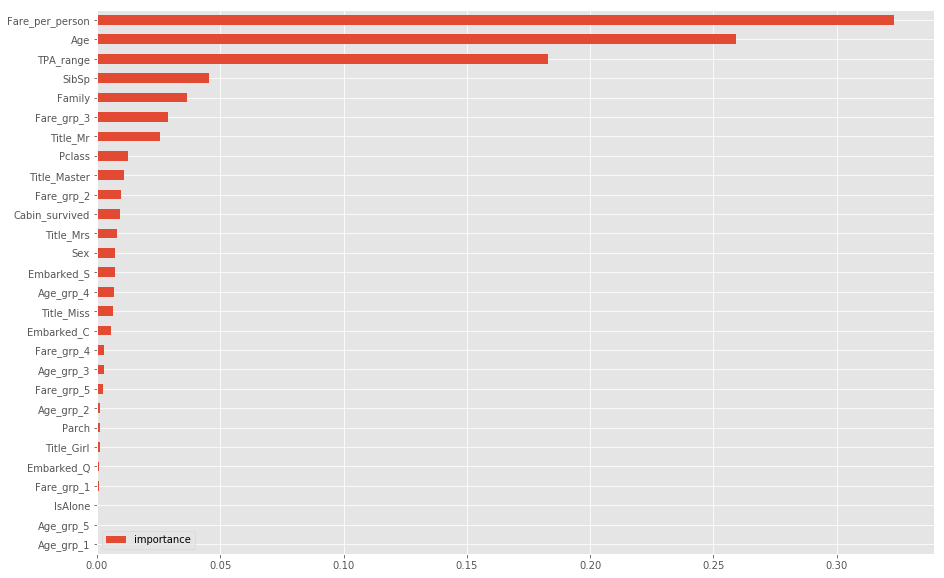

In [1362]:
GB_imp=GradientBoostingClassifier()
GB_imp.fit(train_features,train_labels)
features_imp = pd.DataFrame({'importance':GB_imp.feature_importances_},index=train_features.columns).sort_values('importance',ascending=True)
features_imp.plot(kind='barh',figsize=(15,10))

* Now to increase the overall accuracy, we should minimize the misclassified observations by finding the pattern between them and generate the new feature.

In [1363]:
misclassified=[]
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=42)
for train_index,test_index in kf.split(train_features):
    kf_x_train = train_features.loc[train_index]
    kf_y_train = train_labels[train_index]
    kf_x_test = train_features.loc[test_index]
    pred = GB_imp.fit(kf_x_train,kf_y_train).predict(kf_x_test)
    misclassified.append(train_labels[test_index][pred != train_labels[test_index]].index)
misclassified_index = np.concatenate(misclassified)
misclassified_index

array([  2,  14,  17,  18,  21,  23,  25,  30,  36,  41,  49,  55,  64,
        68,  74,  79,  81,  92,  97, 107, 109, 114, 118, 127, 137, 140,
       146, 165, 177, 186, 187, 192, 199, 204, 205, 207, 209, 220, 224,
       226, 233, 235, 241, 245, 246, 248, 251, 261, 264, 267, 271, 273,
       279, 283, 286, 288, 297, 301, 312, 315, 328, 330, 336, 338, 347,
       357, 391, 396, 400, 414, 415, 423, 429, 430, 444, 447, 449, 452,
       453, 455, 460, 479, 484, 498, 501, 502, 505, 507, 509, 510, 533,
       543, 547, 550, 553, 559, 564, 569, 570, 578, 579, 587, 593, 599,
       604, 617, 622, 630, 643, 645, 647, 654, 657, 660, 664, 673, 677,
       680, 681, 692, 711, 712, 741, 744, 748, 762, 767, 772, 782, 804,
       807, 816, 821, 828, 838, 839, 852, 854, 855, 857])

In [1364]:
len(misclassified_index)

140

In [1365]:
misclassified_df = combined_wo_dummies.loc[misclassified_index]
misclassified_df.head()

,Age,Age_grp,Fare_grp,Fare_per_person,Cabin_survived,Survived,Embarked,Pclass,Sex,Title,Parch,SibSp,Family,IsAlone,TPA_range
2,26.0,2,3,7.9250,0,1.0,S,3,0,Miss,0,0,1,1,9
14,14.0,1,2,7.8542,0,0.0,S,3,0,Girl,0,0,1,1,7
17,30.0,2,4,13.0000,0,1.0,S,2,1,Mr,0,0,1,1,19
18,31.0,2,3,9.0000,0,0.0,S,3,0,Mrs,0,1,2,0,12
21,34.0,3,4,13.0000,1,1.0,S,2,1,Mr,0,0,1,1,19


* From the feature importance diagram, we can see that
> * **Fare_per_person** & **Age** are important, because as they have float datatype we cannot use them for groupby.
> * **Title**, **Pclass** & **Family** are next important feature which can be used for groupby.
> *  As Family have high range of numbers compared to **IsAlone** which is derived from Family itself. 
* We are interested in count  and also the mean of Survived 
> * Count - number of occurance of misclassified group.
> * Mean - which will give us idea about (mean>0.5 : Alive) and (mean<0.5 : Dead)

In [1366]:
misclassified_df.groupby(['Title','Pclass','IsAlone'])['Survived'].agg(['mean','count'])

mean  count
Title  Pclass IsAlone                 
Girl   1      0        0.000000      1
       3      0        0.500000      4
              1        0.000000      1
Master 3      0        1.000000      2
Miss   1      1        0.000000      1
       2      1        0.000000      2
       3      0        0.833333      6
              1        0.235294     17
Mr     1      0        0.550000     20
              1        0.750000     20
       2      0        1.000000      1
              1        1.000000      7
       3      0        1.000000      4
              1        1.000000     32
Mrs    1      0        0.000000      1
       2      0        0.000000      3
              1        0.000000      1
       3      0        0.500000     16
              1        0.000000      1

We can see that **Mr** of all Pclass (mean>0.5) have high probability of Survival, whereas **Miss** & **Mrs** of  all Pclass (mean<0.5) have low probability of Survival.

In [1367]:
#combined.loc[(combined['Title_Mr']==1)&(combined['Pclass'].isin([2,3]))&(combined['IsAlone']==1),'TPA1']=1
#combined.loc[(combined['Title_Mr']==1)&(combined['Pclass']==1)&(combined['IsAlone'].isin([0,1])),'TPA1']=2
#combined.loc[(combined['Title_Miss']==1)&(combined['Pclass']==3)&(combined['IsAlone']==1),'TPA1']=3
#combined.loc[(combined['Title_Mrs']==1)&(combined['Pclass']==3)&(combined['IsAlone']==0),'TPA1']=4
#combined['TPA1'].fillna(0,inplace=True)

**3. Hyperparameter Tuning**

In [ ]:
combined.dtypes

In [1369]:
from sklearn.model_selection import GridSearchCV

train_features=combined.iloc[:891,:]
train_labels=train_features.pop('Survived').astype(int)
test_features=combined.iloc[891:,:].drop('Survived',axis=1)

scaler=StandardScaler()
train_features_scaled=scaler.fit(train_features).transform(train_features)
test_features_scaled=scaler.fit(test_features).transform(test_features)

GB_imp=GradientBoostingClassifier()
GB_imp.fit(train_features,train_labels)
misclassified=[]
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=42)
for train_index,test_index in kf.split(train_features):
    kf_x_train = train_features.loc[train_index]
    kf_y_train = train_labels[train_index]
    kf_x_test = train_features.loc[test_index]
    pred = GB_imp.fit(kf_x_train,kf_y_train).predict(kf_x_test)
    misclassified.append(train_labels[test_index][pred != train_labels[test_index]].index)
misclassified_index = np.concatenate(misclassified)
misclassified_index

array([  2,  14,  17,  18,  21,  23,  25,  30,  36,  41,  49,  55,  64,
        68,  74,  79,  81,  92,  97, 107, 109, 114, 118, 127, 137, 140,
       146, 165, 177, 186, 187, 192, 199, 204, 205, 207, 209, 220, 224,
       226, 233, 235, 241, 245, 246, 248, 251, 261, 264, 267, 271, 273,
       279, 283, 286, 288, 297, 301, 312, 315, 328, 330, 336, 338, 347,
       357, 391, 396, 400, 414, 415, 423, 429, 430, 444, 447, 449, 452,
       453, 455, 460, 479, 484, 498, 501, 502, 505, 507, 509, 510, 533,
       543, 547, 550, 553, 559, 564, 569, 570, 578, 579, 587, 593, 599,
       604, 617, 622, 630, 643, 645, 647, 654, 657, 660, 664, 673, 677,
       680, 681, 692, 711, 712, 741, 744, 748, 762, 767, 772, 782, 804,
       807, 816, 821, 828, 838, 839, 852, 854, 855, 857])

In [ ]:
len(misclassified_index)

k-Nearest Neighbors

In [1371]:
parameter_grid = {'n_neighbors':[4,5,6,7,8], 'algorithm':['auto','ball_tree','kd_tree','brute']}
KNN = GridSearchC(KNeighborsClassifier(),parameter_grid,cv=5)
KNN.fit(train_features_scaled,train_labels)
print('parameter_grid1 : ',KNN.best_params_,KNN.best_score_)

NameError: name 'GridSearchC' is not defined

Logistic Regression

In [ ]:
parameter_grid = {'C':[0.01,0.1,1,10]}
LR = GridSearchCV(LogisticRegression(),parameter_grid,cv=5)
LR.fit(train_features_scaled,train_labels)
print('parameter_grid1 : ',LR.best_params_,LR.best_score_)

Support Vector Machine

In [ ]:
parameter_grid = {'C':[0.1,1,10],'gamma':['auto',0.01,0.1,1,10]}
SVM = GridSearchCV(SVC(),parameter_grid,cv=5)
SVM.fit(train_features_scaled,train_labels)
print('parameter_grid1 : ',SVM.best_params_,SVM.best_score_)

Decision Tree

In [ ]:
parameter_grid = {'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3],'max_depth':[None,2,3,4]}
DT = GridSearchCV(DecisionTreeClassifier(),parameter_grid,cv=5)
DT.fit(train_features_scaled,train_labels)
print('parameter_grid1 : ',DT.best_params_,DT.best_score_)


Random Forest

In [ ]:
parameter_grid = {'n_estimators':[100,110,120,130],'max_depth':[None,1,2,3]}
RF = GridSearchCV(RandomForestClassifier(),parameter_grid,cv=5)
RF.fit(train_features_scaled,train_labels)
print('parameter_grid1 : ',RF.best_params_,RF.best_score_)
parameter_grid = {'min_samples_split':[2,3,4],'min_samples_leaf':[2,3,4]}
RF = GridSearchCV(RandomForestClassifier(n_estimators=120,max_depth=None),parameter_grid,cv=5)
RF.fit(train_features_scaled,train_labels)
print('parameter_grid2 : ',RF.best_params_,RF.best_score_)

Gradient Boosting Decision Tree

In [ ]:
parameter_grid = {'n_estimators':[100,120,140],'max_depth':[2,3,4]}
GB = GridSearchCV(GradientBoostingClassifier(learning_rate=0.2),parameter_grid,cv=5)
GB.fit(train_features_scaled,train_labels)
print('parameter_grid1 : ',GB.best_params_,GB.best_score_)
parameter_grid = {'min_samples_split':[60,65,70],'min_samples_leaf':[1,2,3]}
GB = GridSearchCV(GradientBoostingClassifier(n_estimators=120,max_depth=3,learning_rate=0.2),parameter_grid,cv=5)
GB.fit(train_features_scaled,train_labels)
print('parameter_grid2 : ',GB.best_params_,GB.best_score_)

Adaboost

In [ ]:
parameter_grid ={'n_estimators':[110,120,130],'learning_rate':[0.01,0.1,1,10],'random_state':[None,42]}
Ada = GridSearchCV(AdaBoostClassifier(),parameter_grid,cv=5)
Ada.fit(train_features_scaled,train_labels)
print('parameter_grid1 : ',Ada.best_params_,Ada.best_score_)

In [ ]:
KNN_clf = KNeighborsClassifier(algorithm='auto', n_neighbors=6)
LR_clf = LogisticRegression(C=0.1)
SVM_clf = SVC(C=10,gamma='auto',probability=True)
Tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf=1,min_samples_split=2)
RF_clf = RandomForestClassifier(n_estimators=120,max_depth=None,min_samples_leaf=2,min_samples_split=4)
GB_clf = GradientBoostingClassifier(n_estimators=120,max_depth=3,min_samples_leaf=1,min_samples_split=70,learning_rate=0.2)
Ada_clf = AdaBoostClassifier(learning_rate=0.1,n_estimators=110,random_state=None)

model_list = [('KNN',KNN_clf),('LR',LR_clf),('SVM',SVM_clf),('Tree',Tree_clf),('RF',RF_clf),('GB',GB_clf),('Ada',Ada_clf)]
from sklearn.ensemble import VotingClassifier
voteh_clf = VotingClassifier(estimators=model_list,voting='hard')
votehw_clf = VotingClassifier(estimators=model_list,voting='hard',weights=[1,1,2,1,2,2,1])
votes_clf = VotingClassifier(estimators=model_list,voting='soft')
votesw_clf = VotingClassifier(estimators=model_list,voting='soft',weights=[1,1,2,1,2,2,1])

names = ['KNN','LR','SVM','Tree','RF','GB','Ada','voteh','votehw','votes','votesw']
models = [KNN_clf,LR_clf,SVM_clf,Tree_clf,RF_clf,GB_clf,Ada_clf,voteh_clf,votehw_clf,votes_clf,votesw_clf]

for name,model in zip(names,models):
    score=cross_val_score(model,train_features_scaled,train_labels,cv=5)
    print('{} :: {} , {}'.format(name,score.mean(),score))

In [ ]:
import numpy as np
n_train=train.shape[0]
n_test=test.shape[0]
NFOLDS = 10
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=NFOLDS,shuffle=True,random_state=0)

Out-of-Fold Predictions

In [ ]:
def get_oof(clf,X_train,Y_train,X_test):
    oof_train=np.zeros((n_train,))
    oof_test_mean=np.zeros((n_test,))
    oof_test_single=np.empty((NFOLDS,n_test))
    for i, (train_index,test_index) in enumerate(kf.split(X_train,Y_train)):
        kf_X_train=X_train[train_index]
        kf_Y_train=Y_train[train_index]
        kf_X_test=X_train[test_index]
        
        clf.fit(kf_X_train,kf_Y_train)
        
        oof_train[test_index]=clf.predict(kf_X_test)
        oof_test_single[i,:]=clf.predict(X_test)
    oof_test_mean=oof_test_single.mean(axis=0)
    return oof_train.reshape(-1,1), oof_test_mean.reshape(-1,1)

In [ ]:
#KNN_train,KNN_test= get_oof(KNN_clf, train_features_scaled,train_labels,test_features_scaled)
#LR_train,LR_test= get_oof(LR_clf, train_features_scaled,train_labels,test_features_scaled)
#SVM_train,SVM_test= get_oof(SVM_clf, train_features_scaled,train_labels,test_features_scaled)
#Tree_train,Tree_test= get_oof(Tree_clf, train_features_scaled,train_labels,test_features_scaled)
#RF_train,RF_test= get_oof(RF_clf, train_features_scaled,train_labels,test_features_scaled)
#GB_train,GB_test= get_oof(GB_clf, train_features_scaled,train_labels,test_features_scaled)
#Ada_train,Ada_test= get_oof(Ada_clf, train_features_scaled,train_labels,test_features_scaled)
voteh_train,voteh_test = get_oof(voteh_clf, train_features_scaled,train_labels,test_features_scaled)
votehw_train,votehw_test = get_oof(votehw_clf, train_features_scaled,train_labels,test_features_scaled)
votes_train,votes_test = get_oof(votes_clf, train_features_scaled,train_labels,test_features_scaled)
votesw_train,votesw_test = get_oof(votesw_clf, train_features_scaled,train_labels,test_features_scaled)

X_train_stack = np.concatenate((#KNN_train,LR_train,
                                #SVM_train,#Tree_train,
                                #RF_train,GB_train,#Ada_train,
                                voteh_train,votehw_train,votes_train,votesw_train),axis=1)
X_test_stack = np.concatenate((#KNN_test,LR_test,
                               #SVM_test,#Tree_test,
                               #RF_test,GB_test,#Ada_test,
                               voteh_test,votehw_test,votes_test,votesw_test),axis=1)

In [ ]:
from xgboost import XGBClassifier
parameter_grid = {'n_estimators':[10,20,30],'max_depth':[1,2,3,4,5],'min_child_weight':[1,2,3]}
XGB_clf = GridSearchCV(XGBClassifier(),parameter_grid,cv=5)
XGB_clf.fit(X_train_stack,train_labels)
print('parameter_grid2 : ',XGB_clf.best_params_,XGB_clf.best_score_)
from xgboost import XGBClassifier
parameter_grid = {'gamma':[0.01,0.1,0],'subsample':[0.1,0.5,1]}
XGB_clf = GridSearchCV(XGBClassifier(n_estimators=10,max_depth=3,min_child_weight=1),parameter_grid,cv=5)
XGB_clf.fit(X_train_stack,train_labels)
print('parameter_grid2 : ',XGB_clf.best_params_,XGB_clf.best_score_)
parameter_grid = {'learning_rate':[0.01,0.1,1,10]}
XGB_clf = GridSearchCV(XGBClassifier(n_estimators=10,max_depth=3,min_child_weight=1,gamma=0.01,subsample=1),parameter_grid,cv=5)
XGB_clf.fit(X_train_stack,train_labels)
print('parameter_grid3 : ',XGB_clf.best_params_,XGB_clf.best_score_)

(1309, 12)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755
1234,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,NaN,PC 17755
27,19.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950


Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

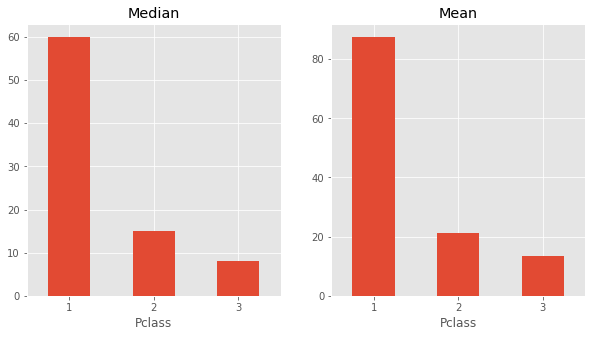

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_per_person
258,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755,128.082300
679,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755,128.082300
737,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755,128.082300
1234,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,NaN,PC 17755,128.082300
27,19.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950,43.833333


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fare_per_person
258,35.0,B,C,512.3292,"Ward, Miss. Anna",0,259,1,female,0,1.0,PC 17755,128.082300
679,36.0,B,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,680,1,male,0,1.0,PC 17755,128.082300
737,35.0,B,C,512.3292,"Lesurer, Mr. Gustave J",0,738,1,male,0,1.0,PC 17755,128.082300
1234,58.0,B,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1235,1,female,0,NaN,PC 17755,128.082300
27,19.0,C,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0.0,19950,43.833333


Survived,0.0,1.0
Cabin,,
A,53.333333,46.666667
B,25.000000,75.000000
C,38.805970,61.194030
D,24.242424,75.757576
E,27.272727,72.727273
F,38.461538,61.538462
G,50.000000,50.000000
T,100.000000,0.000000
U,70.605613,29.394387


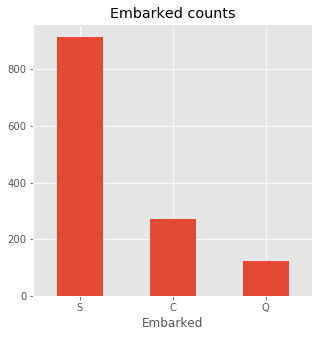

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


,Max_Age,Mean_Age,Min_Age
Title,,,
Master,14.5,5.482642,0.33
Miss,63.0,21.824366,0.17
Mr,80.0,32.784298,11.00
Mrs,76.0,37.040000,14.00


Mr        782
Miss      215
Mrs       202
Master     61
Girl       49
Name: Title, dtype: int64

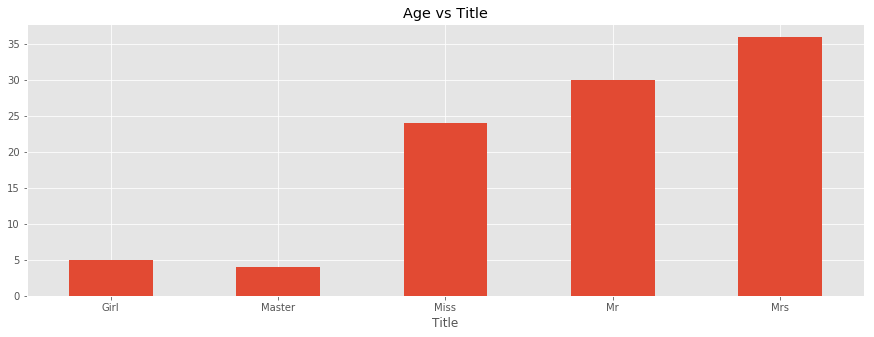

TPA_mean
Title  Pclass IsAlone          
Master 1      0        1.000000
       2      0        1.000000
Miss   1      0        1.000000
       2      0        1.000000
Mrs    1      1        1.000000
Girl   2      0        1.000000
Mrs    1      0        0.974359
Miss   1      1        0.962963
Mrs    2      1        0.909091
Miss   2      1        0.904762
Mrs    2      0        0.900000
       3      1        0.800000
Girl   3      1        0.666667
Miss   3      1        0.596154
Girl   1      0        0.500000
       3      0        0.478261
Mrs    3      0        0.459459
Master 3      0        0.392857
Mr     1      0        0.386364
              1        0.333333
Miss   3      0        0.291667
Mr     3      1        0.121212
       2      1        0.097222
       3      0        0.072727
       2      0        0.037037

Title        object
Pclass        int64
IsAlone       int64
TPA_range     int64
dtype: object

Age                float64
Fare_per_person    float64
Cabin_survived       int64
Pclass               int64
Sex                  int64
Parch                int64
SibSp                int64
Family               int64
IsAlone              int64
TPA_range            int64
Age_grp_1            uint8
Age_grp_2            uint8
Age_grp_3            uint8
Age_grp_4            uint8
Age_grp_5            uint8
Fare_grp_1           uint8
Fare_grp_2           uint8
Fare_grp_3           uint8
Fare_grp_4           uint8
Fare_grp_5           uint8
Embarked_C           uint8
Embarked_Q           uint8
Embarked_S           uint8
Title_Girl           uint8
Title_Master         uint8
Title_Miss           uint8
Title_Mr             uint8
Title_Mrs            uint8
dtype: object

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

,Age,Fare_per_person,Cabin_survived,Pclass,Sex,Parch,SibSp,Family,IsAlone,TPA_range,Age_grp_1,Age_grp_2,Age_grp_3,Age_grp_4,Age_grp_5,Fare_grp_1,Fare_grp_2,Fare_grp_3,Fare_grp_4,Fare_grp_5,Embarked_C,Embarked_Q,Embarked_S,Title_Girl,Title_Master,Title_Miss,Title_Mr,Title_Mrs
891,34.5,7.82920,0,3,1,0,0,1,1,10,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
892,47.0,7.00000,0,3,0,0,1,2,0,6,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
893,62.0,9.68750,0,2,1,0,0,1,1,10,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
894,27.0,8.66250,0,3,1,0,0,1,1,10,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
895,22.0,6.14375,0,3,0,1,1,3,0,6,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


KNN :: 0.8306116383968009 , [ 0.82122905  0.80446927  0.8258427   0.83146067  0.8700565 ]
LR :: 0.8238953154972345 , [ 0.81564246  0.79888268  0.81460674  0.80898876  0.88135593]
NB :: 0.7868853569436274 , [ 0.75977654  0.76536313  0.79213483  0.76404494  0.85310734]


SVM :: 0.8317478589694896 , [ 0.81005587  0.81005587  0.83146067  0.83146067  0.87570621]
Tree :: 0.7946682852286361 , [ 0.75418994  0.79329609  0.82022472  0.80337079  0.80225989]
RF :: 0.8002866173934414 , [ 0.79888268  0.77653631  0.82022472  0.7752809   0.83050847]


GB :: 0.8474469525535084 , [ 0.84357542  0.81564246  0.85955056  0.83146067  0.88700565]


Ada :: 0.8249683398072266 , [ 0.81005587  0.82122905  0.8258427   0.81460674  0.85310734]


KNN :: 0.8160172381814654 , [ 0.79888268  0.79888268  0.81460674  0.81460674  0.85310734]
LR :: 0.8216543306285191 , [ 0.81005587  0.79329609  0.81460674  0.81460674  0.87570621]
NB :: 0.7666606378425037 , [ 0.75977654  0.76536313  0.79213483  0.66292135  0.85310734]


SVM :: 0.8406739232431386 , [ 0.84916201  0.83240223  0.83146067  0.80898876  0.88135593]


Tree :: 0.7980518386672468 , [ 0.77094972  0.78212291  0.82022472  0.79775281  0.81920904]
RF :: 0.8126274786003339 , [ 0.80446927  0.79888268  0.83707865  0.78089888  0.84180791]


GB :: 0.8474469525535084 , [ 0.84357542  0.81564246  0.85955056  0.83146067  0.88700565]


Ada :: 0.8249683398072266 , [ 0.81005587  0.82122905  0.8258427   0.81460674  0.85310734]


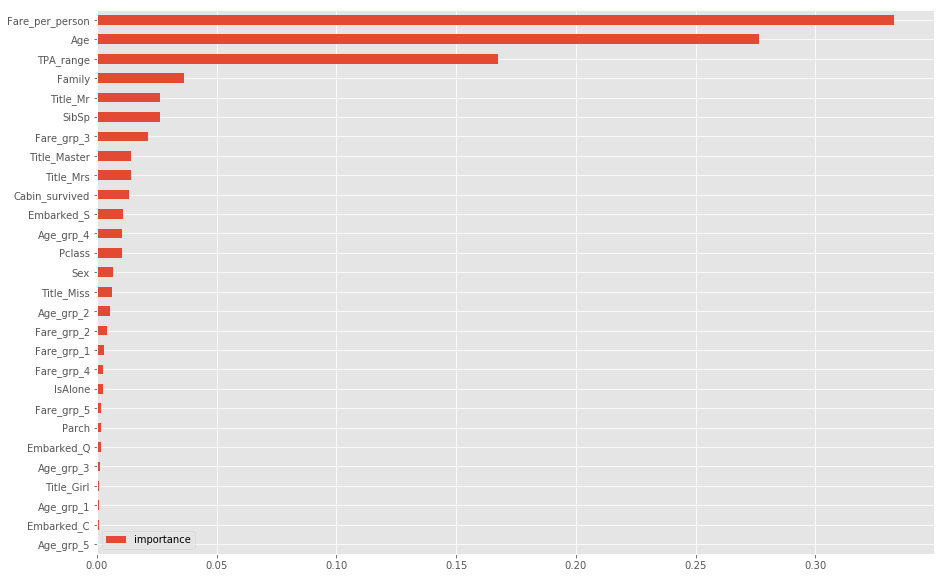

array([  2,  14,  17,  18,  21,  23,  25,  36,  41,  49,  55,  68,  74,
        79,  81,  97, 100, 107, 109, 114, 118, 125, 127, 137, 140, 146,
       165, 177, 186, 187, 192, 199, 204, 205, 207, 209, 220, 224, 226,
       233, 235, 245, 246, 248, 251, 261, 264, 267, 271, 273, 279, 283,
       286, 288, 297, 301, 312, 328, 330, 338, 339, 347, 357, 391, 396,
       400, 414, 415, 419, 423, 429, 430, 444, 447, 449, 452, 453, 455,
       460, 484, 498, 501, 502, 505, 507, 509, 510, 533, 543, 547, 550,
       553, 559, 564, 569, 570, 578, 579, 587, 593, 599, 604, 622, 630,
       643, 645, 647, 654, 657, 660, 664, 673, 677, 680, 681, 692, 698,
       711, 712, 741, 744, 748, 762, 767, 772, 782, 799, 804, 807, 816,
       821, 828, 838, 839, 852, 854, 857])

137

,Age,Age_grp,Fare_grp,Fare_per_person,Cabin_survived,Survived,Embarked,Pclass,Sex,Title,Parch,SibSp,Family,IsAlone,TPA_range
2,26.0,2,3,7.9250,0,1.0,S,3,0,Miss,0,0,1,1,5
14,14.0,1,2,7.8542,0,0.0,S,3,0,Girl,0,0,1,1,4
17,30.0,2,4,13.0000,0,1.0,S,2,1,Mr,0,0,1,1,10
18,31.0,2,3,9.0000,0,0.0,S,3,0,Mrs,0,1,2,0,6
21,34.0,3,4,13.0000,1,1.0,S,2,1,Mr,0,0,1,1,10


mean  count
Title  Pclass IsAlone                 
Girl   1      0        0.000000      1
       3      0        0.250000      4
              1        0.000000      1
Master 3      0        1.000000      3
Miss   1      1        0.000000      1
       2      1        0.000000      2
       3      0        0.800000      5
              1        0.176471     17
Mr     1      0        0.578947     19
              1        0.789474     19
       2      0        1.000000      1
              1        1.000000      7
       3      0        1.000000      4
              1        1.000000     32
Mrs    1      0        0.000000      1
       2      0        0.000000      3
              1        0.000000      1
       3      0        0.466667     15
              1        0.000000      1

Age                float64
Fare_per_person    float64
Cabin_survived       int64
Survived           float64
Pclass               int64
Sex                  int64
Parch                int64
SibSp                int64
Family               int64
IsAlone              int64
TPA_range            int64
Age_grp_1            uint8
Age_grp_2            uint8
Age_grp_3            uint8
Age_grp_4            uint8
Age_grp_5            uint8
Fare_grp_1           uint8
Fare_grp_2           uint8
Fare_grp_3           uint8
Fare_grp_4           uint8
Fare_grp_5           uint8
Embarked_C           uint8
Embarked_Q           uint8
Embarked_S           uint8
Title_Girl           uint8
Title_Master         uint8
Title_Miss           uint8
Title_Mr             uint8
Title_Mrs            uint8
dtype: object

array([  2,  14,  17,  18,  21,  23,  25,  36,  41,  49,  55,  68,  74,
        79,  81,  97, 100, 107, 109, 114, 118, 125, 127, 137, 140, 146,
       165, 177, 186, 187, 192, 199, 204, 205, 207, 209, 220, 224, 226,
       233, 235, 245, 246, 248, 251, 261, 264, 267, 271, 273, 279, 283,
       286, 288, 297, 301, 312, 328, 330, 338, 339, 347, 357, 391, 396,
       400, 414, 415, 419, 423, 429, 430, 444, 447, 449, 452, 453, 455,
       460, 484, 498, 501, 502, 505, 507, 509, 510, 533, 543, 547, 550,
       553, 559, 564, 569, 570, 578, 579, 587, 593, 599, 604, 622, 630,
       643, 645, 647, 654, 657, 660, 664, 673, 677, 680, 681, 692, 698,
       711, 712, 741, 744, 748, 762, 767, 772, 782, 799, 804, 807, 816,
       821, 828, 838, 839, 852, 854, 857])

137

NameError: name 'GridSearchC' is not defined

In [ ]:
from xgboost import XGBClassifier
XGB_clf = XGBClassifier(n_estimators=10,learning_rate=0.01,max_depth=3,min_child_weight=1,gamma=0.01,subsample=1)
XGB_clf.fit(X_train_stack,train_labels)
pred = XGB_clf.predict(X_test_stack)
test_labels = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':list(map(int,pred))})
test_labels.to_csv('Titanic_solution.csv',index=False)